In [67]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

dataset = pd.read_csv('preprocessed_dataset.csv')

# Handle missing values by filling them with an empty string
dataset['lemmatized_title'].fillna('', inplace=True)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(dataset['lemmatized_title'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, dataset['real'], test_size=0.3, random_state=42)

# Train a logistic regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

Accuracy: 0.8278488288547206
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.41      0.53      1690
           1       0.83      0.96      0.89      5269

    accuracy                           0.83      6959
   macro avg       0.81      0.68      0.71      6959
weighted avg       0.82      0.83      0.81      6959



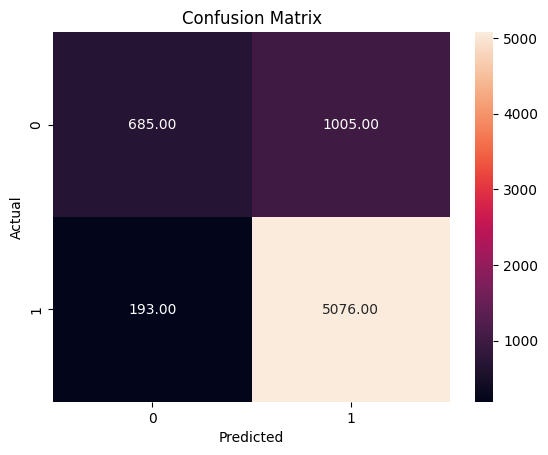

In [68]:
#For Test set classification report
# Predict on the test set

y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report_result}")

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Optimization algorithm

}

# Perform GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=100000,random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'solver': 'liblinear'}
Accuracy: 0.8325908894956172


Accuracy: 0.8325908894956172
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.52      0.60      1690
           1       0.86      0.93      0.89      5269

    accuracy                           0.83      6959
   macro avg       0.79      0.73      0.75      6959
weighted avg       0.82      0.83      0.82      6959



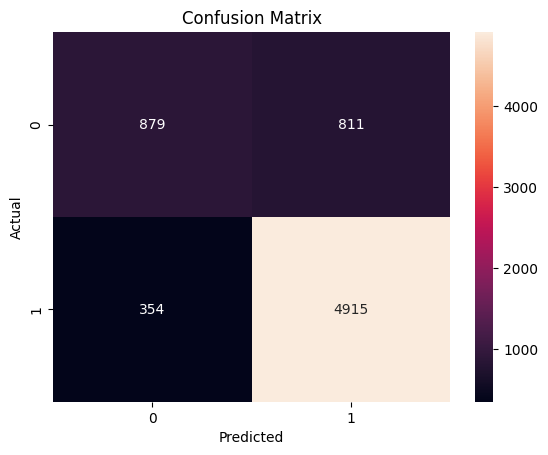

In [70]:
# Predict on the test set for best parameters from Hyperparameter tuning
y_pred1= best_model.predict(X_test)

# Evaluate the model's performance
accuracy1= accuracy_score(y_test, y_pred1)
classification_report_result1 = classification_report(y_test, y_pred1)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report_result1}")

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred1)

# Plot the confusion matrix using seaborn

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


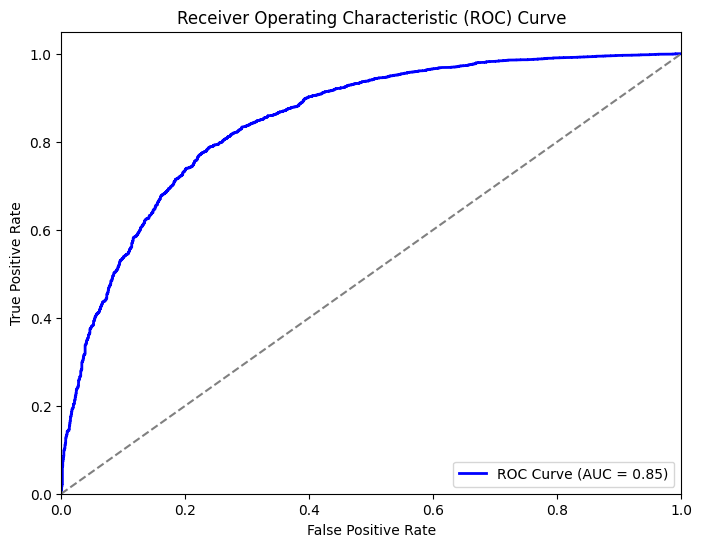

In [71]:
#ROC CURVE

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the test set
y_probs = best_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (assuming binary classification)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
